## AIDI 2004 - AI in Enterprise Systems

#### Lab #2 - Git, GitHub, ML

Build a model for breast cancer diagnosis dataset
cancer.csv

**Submitted By : Sourabh Potdar**  

**Student No. 100844478**

### Import libs

In [1]:
# import dependencies
# data cleaning and manipulation
#Pandas is a popular Python-based toolkit for data analysis which can be imported using import pandas as pd.
import pandas as pd
#NumPy is a library of Python which is used to deal with  arrays  and it  can be imported using import numpy as np.
import numpy as np

# data visualization
#Matplotlib is a comprehensive library for creating  static, animated and interactive visualizations in python. 
import matplotlib.pylab as plt
#Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler       #Scaling the data
from sklearn.svm import SVC                            #Support Vector Machine
from sklearn.metrics import classification_report      #Classification Report
from sklearn.metrics import confusion_matrix           #Confusion Matrix
from sklearn.naive_bayes import GaussianNB             #Naïve Bayes
from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.metrics import accuracy_score             #Accuracy Score

%matplotlib inline

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

In [2]:
# Read data from file 'cancer.csv' 
# and create a pandas DataFrame containing cancer data
df = pd.read_csv("cancer.csv")

In [3]:
#Returns top 5 rows of a data frame or series
df.head()

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Remove the 'id' column
df = df.drop(['id'], axis = 1)

In [5]:
#unique values of each column
temp=[]
for col in df.columns:
    temp.append([col,df[col].nunique()])
temp=pd.DataFrame(temp,columns=['Columns','No. of Unique'])       
print(temp)

,Columns,No. of Unique
0,Clump Thickness,10
1,UofCSize,10
2,UofCShape,10
3,Marginal Adhesion,10
4,SECSize,10
5,Bare Nuclei,10
6,Bland Chromatin,10
7,Normal Nucleoli,10
8,Mitoses,9
9,Class,2


In [6]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Clump Thickness    683 non-null    int64
 1   UofCSize           683 non-null    int64
 2   UofCShape          683 non-null    int64
 3   Marginal Adhesion  683 non-null    int64
 4   SECSize            683 non-null    int64
 5   Bare Nuclei        683 non-null    int64
 6   Bland Chromatin    683 non-null    int64
 7   Normal Nucleoli    683 non-null    int64
 8   Mitoses            683 non-null    int64
 9   Class              683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


<AxesSubplot:>

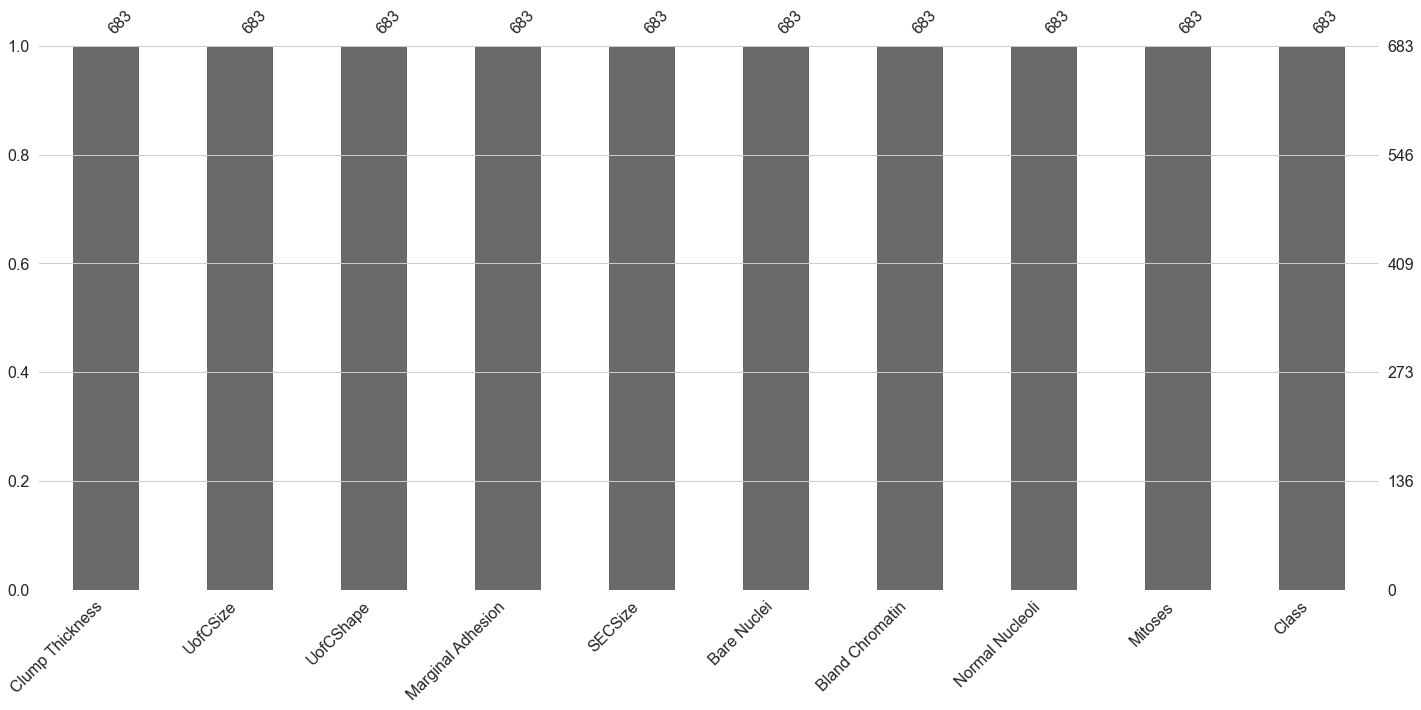

In [7]:
#Shows the datatypes for each column and total number of entries in dataset
import missingno as msno
msno.bar(df)

No null values treatment is required  
Data contains 10 variables and 683 records

In [8]:
#Key Statistics (Numerical Columns only)
df.describe()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
#Shows the datatypes for each column and total number of entries in dataset
df.info

<bound method DataFrame.info of      Clump Thickness  UofCSize  UofCShape  Marginal Adhesion  SECSize  \
0                  5         1          1                  1        2   
1                  5         4          4                  5        7   
2                  3         1          1                  1        2   
3                  6         8          8                  1        3   
4                  4         1          1                  3        2   
..               ...       ...        ...                ...      ...   
678                3         1          1                  1        3   
679                2         1          1                  1        2   
680                5        10         10                  3        7   
681                4         8          6                  4        3   
682                4         8          8                  5        4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0              1      

In [10]:
#Check the data type of each column
df.dtypes

Clump Thickness      int64
UofCSize             int64
UofCShape            int64
Marginal Adhesion    int64
SECSize              int64
Bare Nuclei          int64
Bland Chromatin      int64
Normal Nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

Boxplot Visualization

Text(0.5, 1.0, 'Boxplot for Class')

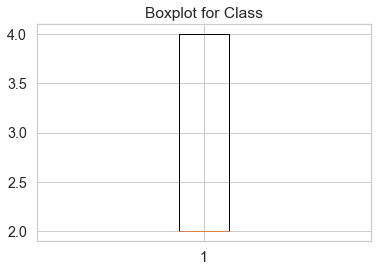

In [11]:
#Boxplot graph for Class
df1=df["Class"]
plt.boxplot(df1)
plt.title("Boxplot for Class")

<AxesSubplot:>

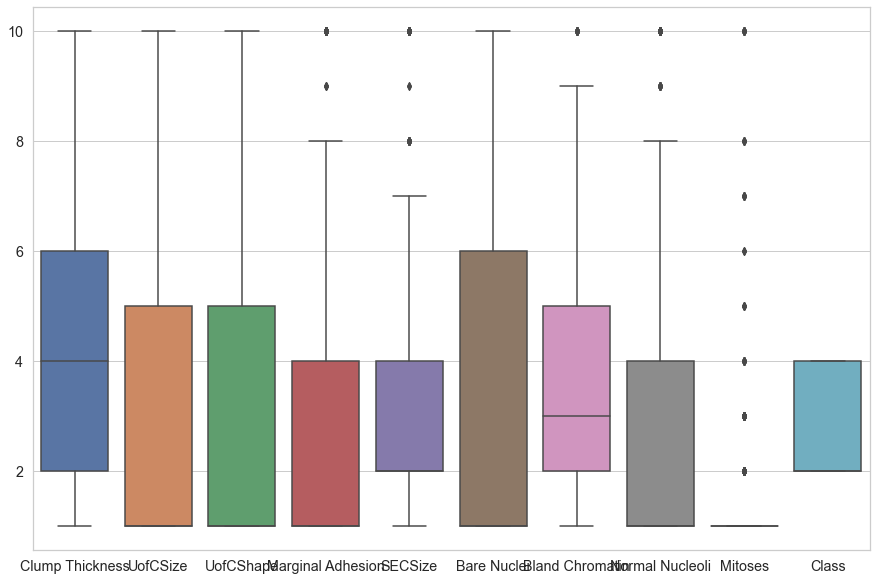

In [12]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

C:\ProgramData\Anaconda3\envs\AI-Env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2    444
4    239
Name: Class, dtype: int64

Number of cells labeled Class 2 for Benign:  444
Number of cells labeled Class 4 for Malignant :  239

% of cells labeled Class 2 for Benign 65.01 %
% of cells labeled Class 4 for Malignant 34.99 %


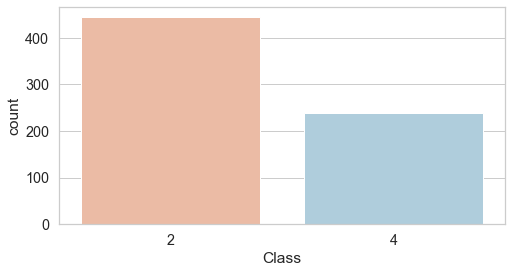

In [13]:
# Visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['Class'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['Class'].value_counts()
print(df['Class'].value_counts())
print('')
print('Number of cells labeled Class 2 for Benign: ', benign)
print('Number of cells labeled Class 4 for Malignant : ', malignant)
print('')
print('% of cells labeled Class 2 for Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Class 4 for Malignant', round(malignant / len(df) * 100, 2), '%')

In [14]:
#Coorelation for all numerical variables in cancer dataset.
df.corr()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UofCSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UofCShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SECSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


HeatMap Visualization

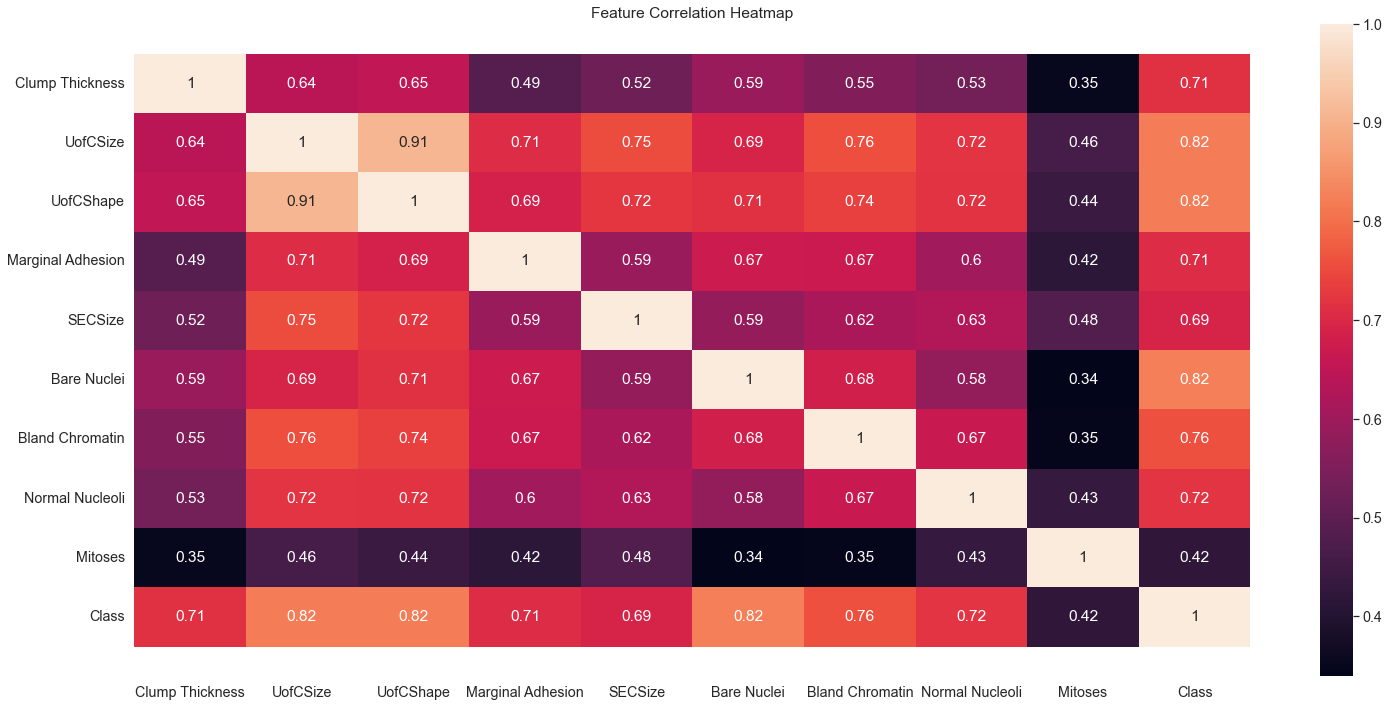

In [15]:
#Correaltion heatmap, with 1 being highest correlation and 0 being no correlation and 1 being highest correlation.
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot=True)
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<AxesSubplot:>

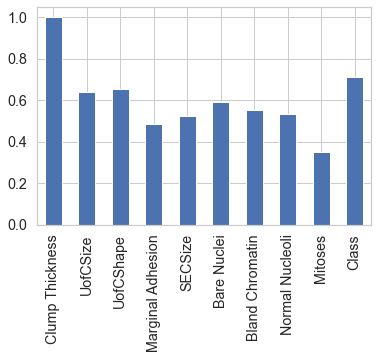

In [16]:
#Correlation In Data
df.corr()['Clump Thickness'].plot(kind='bar')

PairPlot Visualization

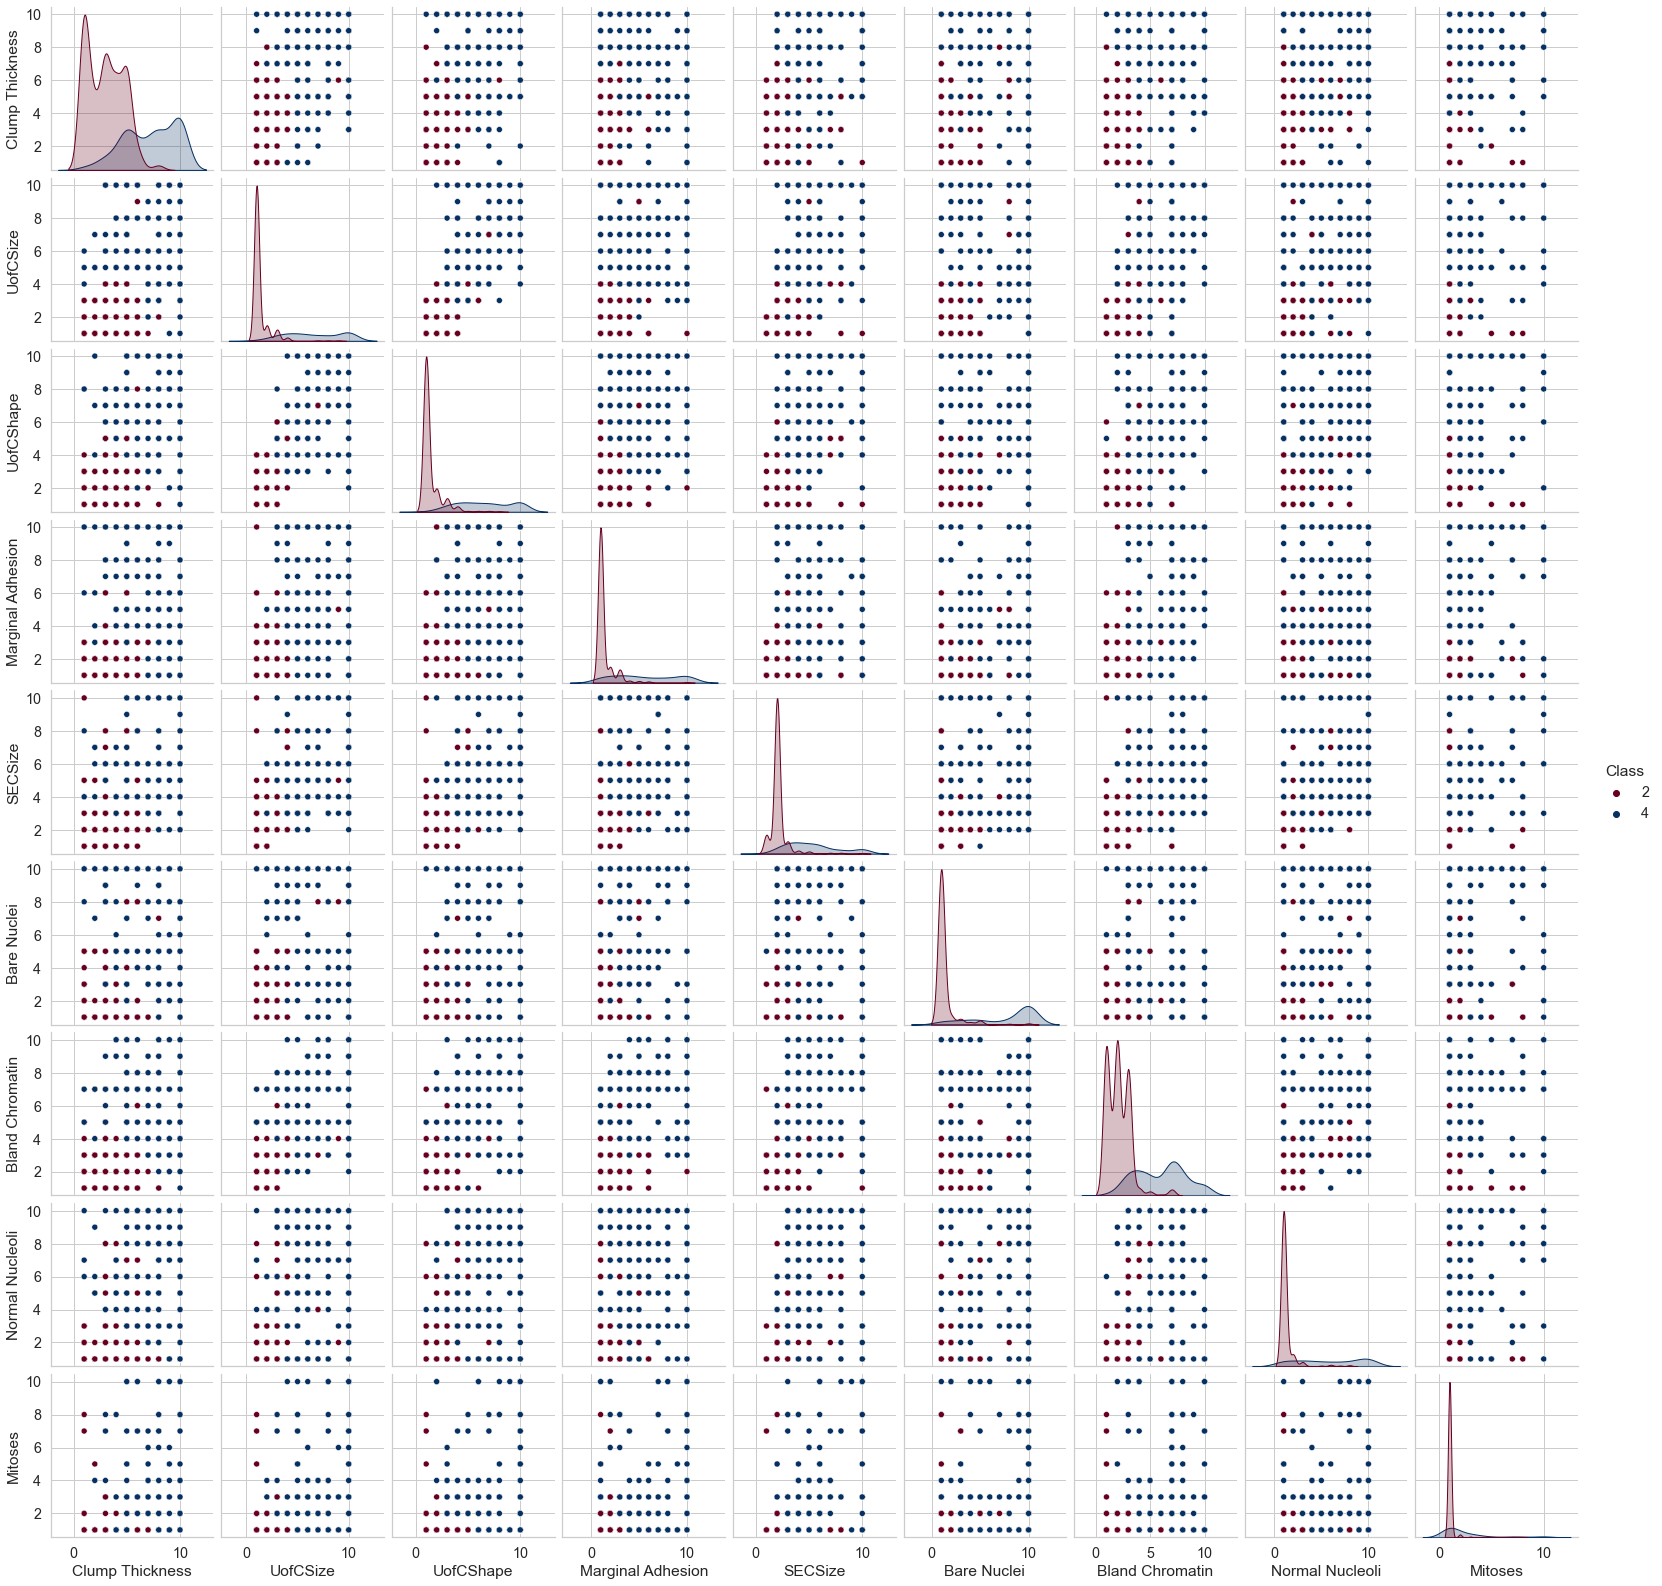

In [17]:
# generate a scatter plot matrix with the columns
cols = ['Clump Thickness', 'UofCSize', 
       'UofCShape', 'Marginal Adhesion', 
       'SECSize', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']

sns.pairplot(data=df[cols], hue='Class', palette='RdBu')

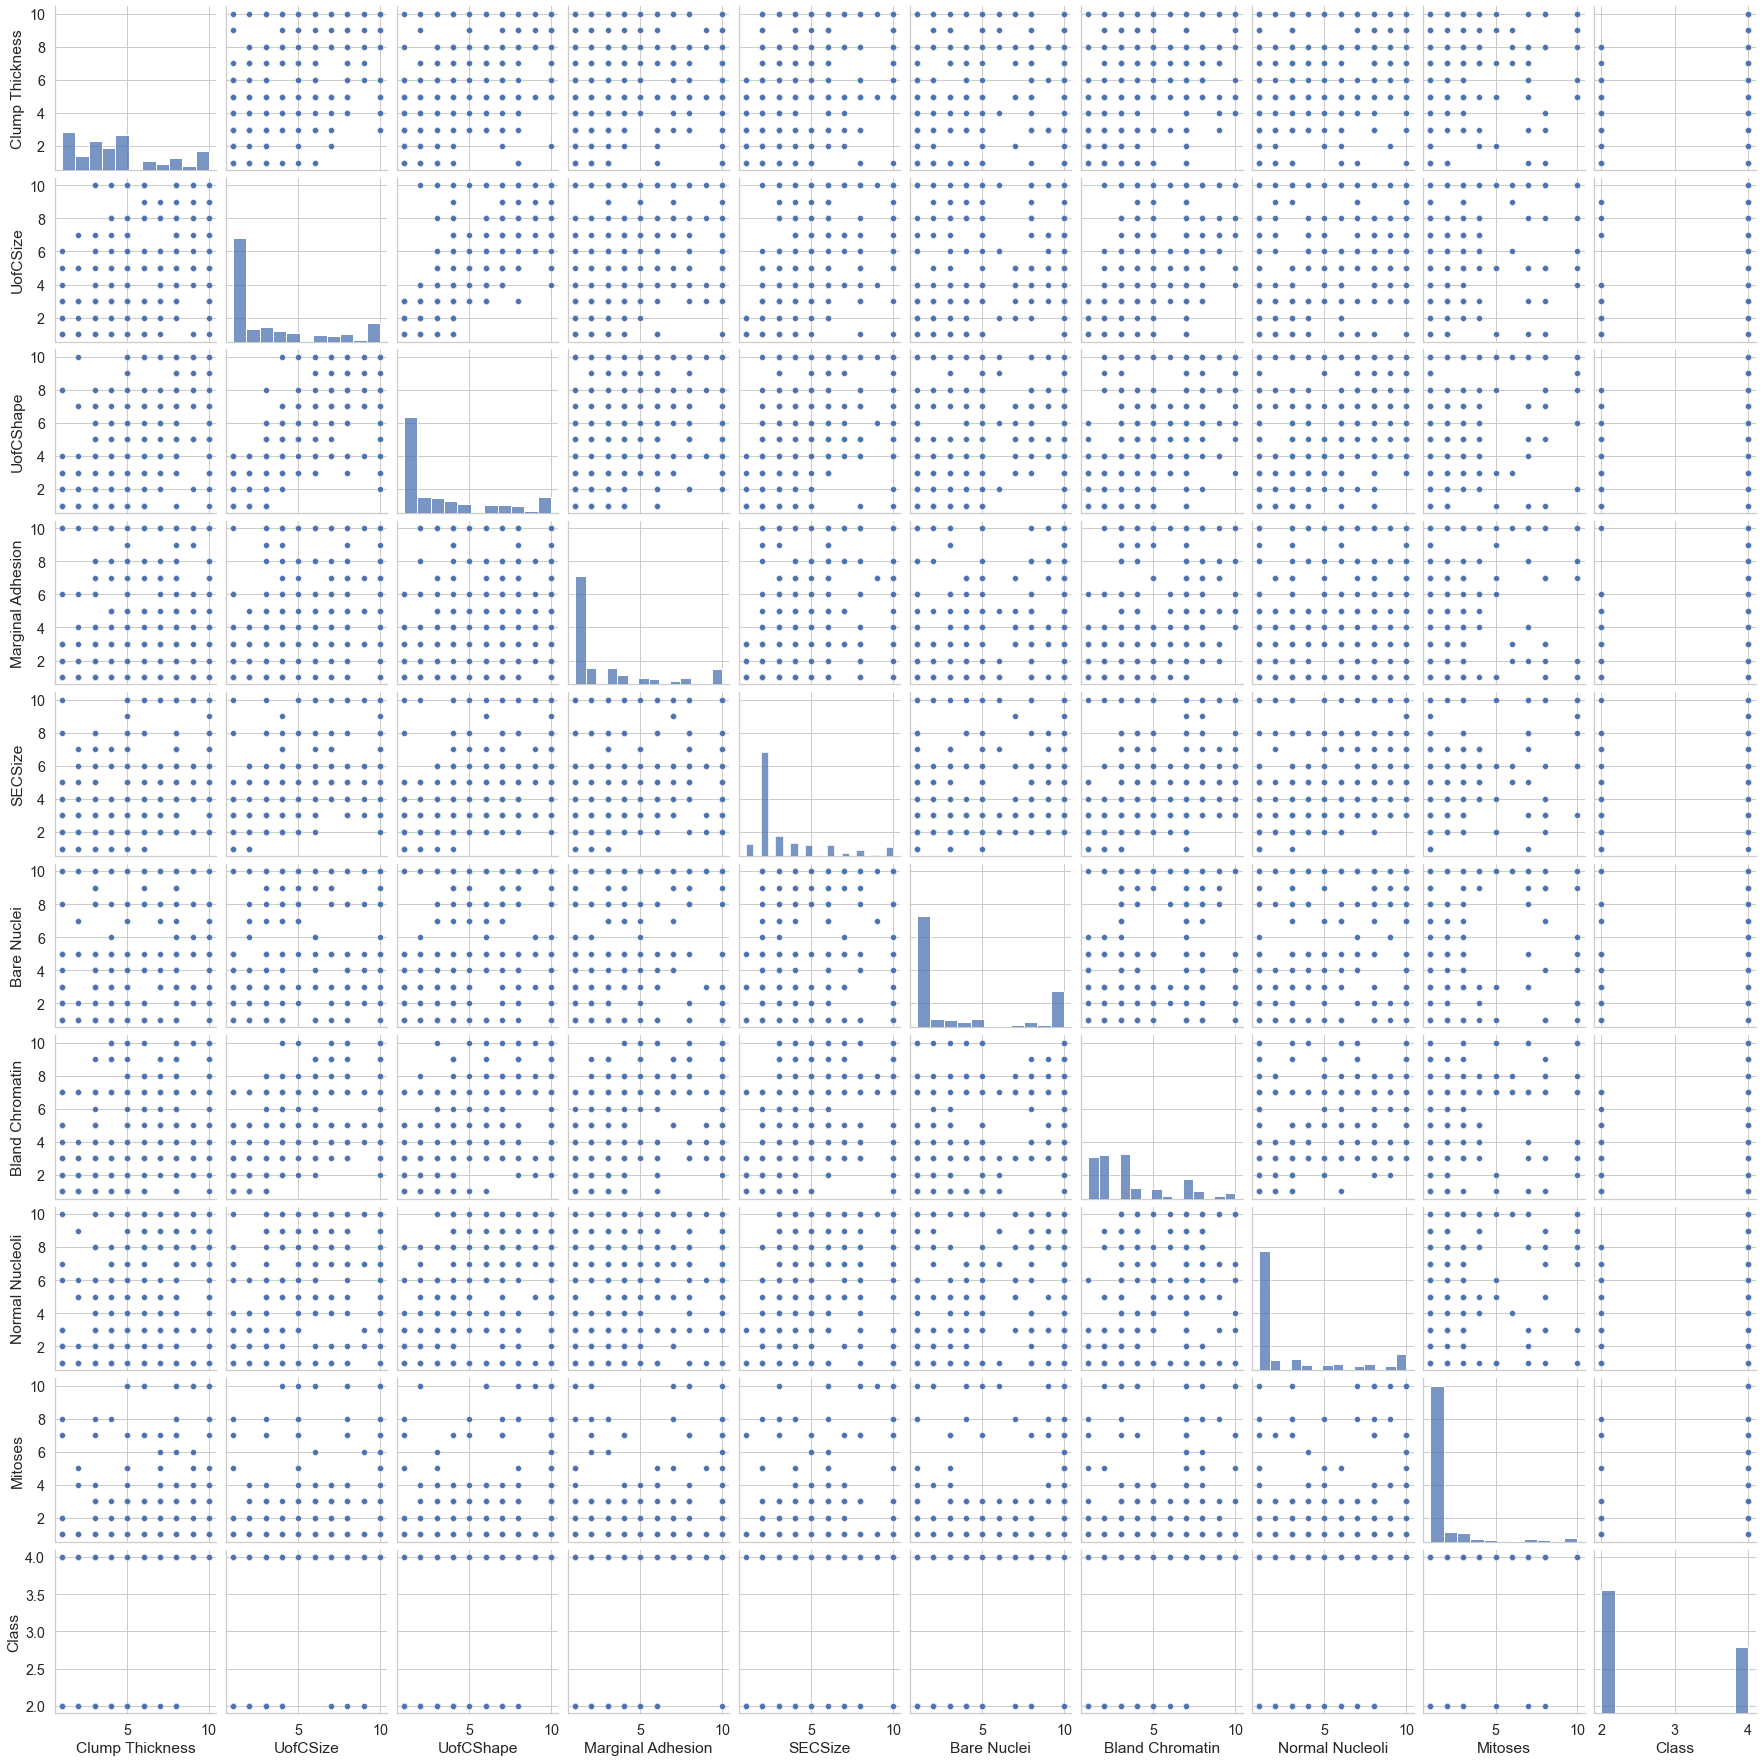

In [18]:
#sns pairplot - It plots the pairwise plot of multiple features/variable in a grid format.
sns.pairplot(df)
plt.savefig('foo.png')

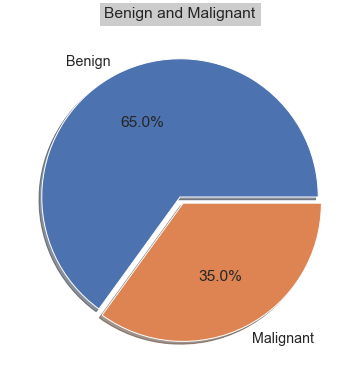

In [19]:
# Shows a figure and axes
from pylab import figure, axes, pie, title, show

# Make a square figure and axes
figure(1, figsize=(6, 6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'Benign','Malignant' 
fracs = [65.05, 34.99]

explode = (0, 0.05)
pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
title('Benign and Malignant', bbox={'facecolor': '0.8', 'pad': 5})

show()  

C:\Users\Sourabh\AppData\Local\Temp/ipykernel_15332/2162153784.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


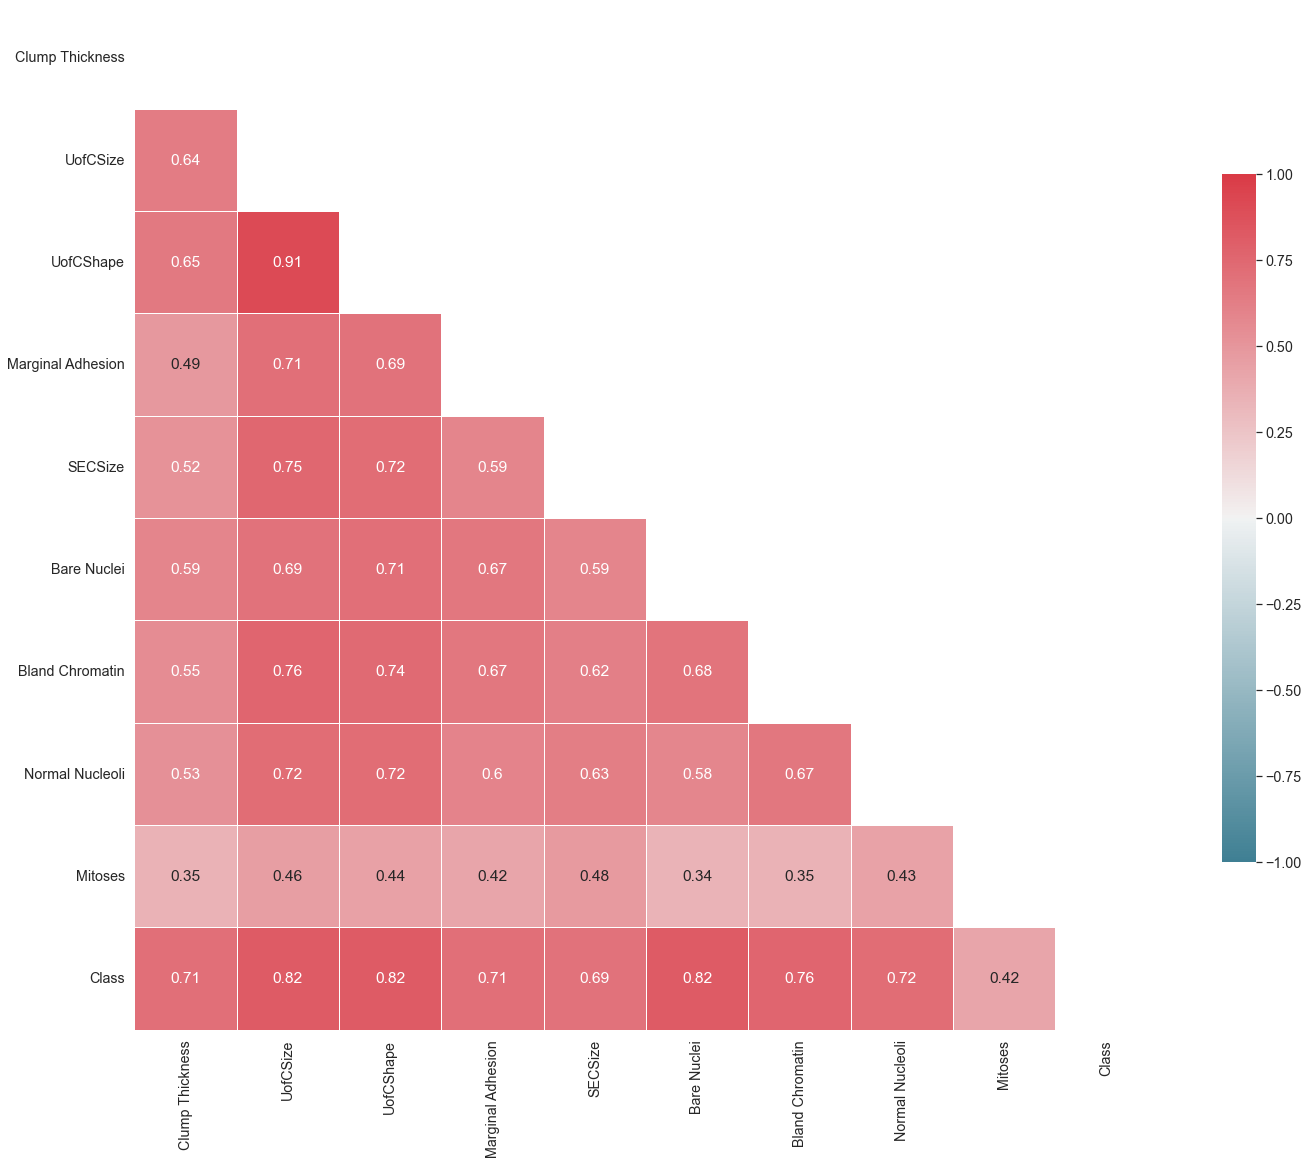

In [20]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Distribution Plot Visualization

C:\ProgramData\Anaconda3\envs\AI-Env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Class')

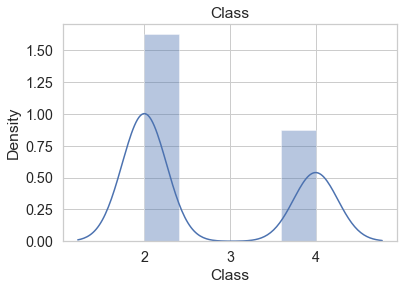

In [21]:
#Distribution Plot
ax = sns.distplot(df.Class)
ax.set_title("Class")

## Support Vector Machine [SVM] Algorithm

Step 1 - Defining x and y variables.

In [22]:
#Define x and y variables
x = df.drop('Class',axis=1).to_numpy()
y = df['Class'].to_numpy()

Step 2 - Splitting Train data and Test data. 

In [23]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)

Step 3 - Standardization of the data.  

In [24]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [25]:
#Print the x Training Data.
print("X-Train", x_train)

X-Train [[ 4  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 ...
 [ 1  1  1 ...  3  1  1]
 [ 3  1  1 ...  1  1  1]
 [10 10 10 ...  8  2  1]]


In [26]:
#Print the y Training Data.
print("Y-Train", y_train)

Y-Train [2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 4 4 2 2 2
 2 4 2 4 2 4 2 2 2 2 4 4 4 4 2 2 2 4 2 2 2 4 2 2 4 4 2 2 4 4 2 2 4 2 4 2 4
 2 2 2 2 4 2 4 4 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4
 2 2 4 4 2 2 2 2 4 2 4 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 4 4
 4 2 2 4 4 2 4 4 2 4 2 2 2 2 2 2 4 4 2 4 2 4 2 2 4 2 2 2 4 2 2 2 2 4 4 4 4
 4 4 2 2 4 4 2 4 2 2 4 4 2 4 2 4 2 2 4 2 4 2 2 2 2 2 2 4 2 4 2 2 4 2 2 2 2
 2 2 2 4 2 4 4 4 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 2 2 4
 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 4 4 2 2 2 4 4 2 2 2 2 2 4 4 2
 2 4 4 4 4 2 2 2 2 2 2 4 4 4 4 4 4 2 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2
 2 2 4 2 2 2 4 2 4 2 4 2 4 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2
 4 4 2 4 4 2 2 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 4 4 4
 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 2 2 4 2 2
 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 4 2
 4 4 4 2 2 4 4 2 

In [27]:
#Print the x Testing Data.
print("X-Test", x_test)

X-Test [[ 4  1  1 ...  3  1  1]
 [ 5  3  5 ...  5  3  1]
 [ 5  1  1 ...  2  1  1]
 ...
 [ 3 10  8 ...  9  3  8]
 [ 4  1  1 ...  2  1  1]
 [ 8 10  4 ...  8  2  1]]


In [28]:
#Print the y Testing Data.
print("Y-Test", y_test)

Y-Test [2 4 2 4 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 4 2
 4 4 2 2 2 4 4 4 2 2 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2
 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2
 2 2 2 4 2 2 2 2 4 2 4 4 2 4 2 2 4 4 2 4 4 4 2 4 2 4]


In [29]:
#Shape of X-train data to determine split of data
x_train.shape

(546, 9)

In [30]:
#Shape of Y-test data to determine split of data
y_test.shape

(137,)

Step 4 - Import Support Vector Machine [SVM], classification_report and confusion_matrix package to calculate and display accuracy, confusion_matrix and classification_report.

In [31]:
#Script for Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

Step 5 - Modeling the Support Vector Machine [SVM] Algorithm

Confusion Matrix
[[89  0]
 [ 2 46]]


C:\Users\Sourabh\AppData\Local\Temp/ipykernel_15332/3203837579.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["Benign","Malignant"])
C:\Users\Sourabh\AppData\Local\Temp/ipykernel_15332/3203837579.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(["Benign","Malignant"])


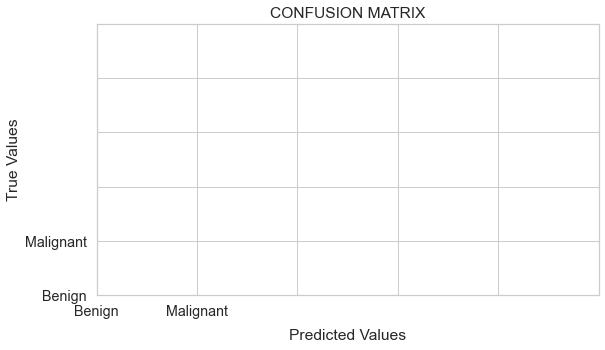

In [32]:
#Script for Support Vector Machine
for name,method in [('SVM', SVC(kernel='linear',random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print("Confusion Matrix")
    print(confusion_matrix(y_test,predict))  
    
#Confusion matrix
cfm = confusion_matrix(y_test, predict)
plt.figure(figsize=(9,5))
sns.heatmap(cfm,center=True)
#sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True)
ax = plt.subplot()
ax.set_xlabel("Predicted Values",labelpad = 10)
ax.set_ylabel("True Values")
ax.xaxis.set_ticklabels(["Benign","Malignant"])
ax.yaxis.set_ticklabels(["Benign","Malignant"])
ax.set_title("CONFUSION MATRIX")
plt.show()

In [33]:
#Confusion matrix
cfm = confusion_matrix(y_test, predict)
      
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print(cfm)
print('')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predict) * 100, 1), '%')

[[89  0]
 [ 2 46]]

True Negative: 89
False Positive: 0
False Negative: 2
True Positive: 46
Correct Predictions 98.5 %


In [34]:
# Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,predict)

#from sklearn.metrics import accuracy_score
accuracy_s=accuracy_score(y_test,predict)
print("Accuracy of the model: ", accuracy_s)
print('')
print(cr)

Accuracy of the model:  0.9854014598540146

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        89
           4       1.00      0.96      0.98        48

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



In [35]:
#Confusion matrix
cfm = confusion_matrix(y_test, predict)
      
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion matrix')
print(cfm)
print('')
# Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,predict)
print(cr)
print('')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Accuracy of the model:', 
      round((true_negative + true_positive) / len(predict) * 100, 1), '%')


Confusion matrix
[[89  0]
 [ 2 46]]

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        89
           4       1.00      0.96      0.98        48

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137


True Negative: 89
False Positive: 0
False Negative: 2
True Positive: 46
Accuracy of the model: 98.5 %


Step 6 - Calculate the accuracy.

In [36]:
# Calculates the accuracy on the training set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy on the training set:{:0.2f}'.format(float(accuracy_score(y_train, method.predict(x_train2)))))

Accuracy on the training set:0.97


In [37]:
# Calculates the accuracy on the testing set
print('Accuracy on the testing set:{:0.2f}'.format(float(accuracy_score(y_test, method.predict(x_test2)))))

Accuracy on the testing set:0.99


In [38]:
# Calculates the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_s=accuracy_score(y_test,predict)
print("Accuracy of the model: ", accuracy_s)

Accuracy of the model:  0.9854014598540146


**<font color='blue'>Support Vector Machine Kernel (radial basis function)</font>**

In [39]:
#Using SVC method of svm class to use Kernel SVM Algorithm
#training the model

from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state = 100)
ksvm_classifier.fit(x_train2, y_train)
predict = ksvm_classifier.predict(x_test2)

#Confusion matrix
print("Confusion Matrix")
cfm = confusion_matrix(y_test, predict)
print(cfm)
print('')
print(classification_report(y_test,predict))
print('')

#accuracy
ksvm_score = accuracy_score(y_test, predict)
print("Accuracy of the model:", ksvm_score)

Confusion Matrix
[[88  1]
 [ 1 47]]

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        89
           4       0.98      0.98      0.98        48

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137


Accuracy of the model: 0.9854014598540146


In [40]:
#Confusion matrix
cfm = confusion_matrix(y_test, predict)
       
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predict) * 100, 1), '%')

True Negative: 88
False Positive: 1
False Negative: 1
True Positive: 47
Correct Predictions 98.5 %
